# DATA SCIENCE INTERN @BHARAT INTERN
## AUTHOR : RITIKA ROY CHOWDHURY
# TASK 1 : STOCK PREDICTION
## PURPOSE : TO PREDICT THE STOCK PRICE OF A COMPANY USING LSTM.

# ABOUT DATASET
## NSE TataGlobal Stock Prediction
This dataset contains historical data of NSE TataGlobal's stock prices and related attributes. It consists of 9 columns and a smaller subset of 2034 rows. Each column represents a specific attribute, and each row contains the corresponding values for that attribute.

The columns in the dataset are as follows:

1. Date: The year and date of the stock data.
2. Open: The opening value of NSE TataGlobal's stock on the given day.
3. High: The highest value reached by NSE TataGlobal's stock on the given day.
4. Low: The lowest value reached by NSE TataGlobal's stock on the given day.
5. Last: The value that was calculated last by NSE TataGlobal's stock on the given day
6. Close: The closing price of NSE TataGlobal's stock on a particular day.
7. Total Trade Quantity: The sum total of all the shares of a particular company, bought and sold in a particular trading session
8. Turnover: Share turnover is a measure of stock liquidity, calculated by dividing the total number of shares traded during some period by the average number of shares outstanding for the same period. The higher the share turnover, the more liquid company shares are.

The dataset is available at Kaggle : https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv

In [ ]:
#Import necessary Libraries
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.layers import LSTM
%matplotlib inline

In [ ]:
#Import the data and remove rows containing NAN values
df = pd.read_csv('https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv')
df = df.dropna()
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [ ]:
df.tail() # fetching first 10 rows of dataset

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56


In [ ]:
df_close = df['Close']

In [ ]:
df_close.shape

(2035,)

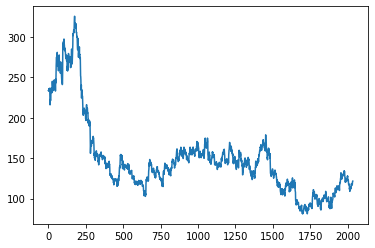

In [ ]:
plt.plot(df_close)

In [ ]:
scaler = MinMaxScaler(feature_range = (0,1))
df_close = scaler.fit_transform(np.array(df_close).reshape(-1,1))

In [ ]:
df_close.shape

(2035, 1)

In [ ]:
df_close

array([[0.62418301],
       [0.62214052],
       [0.62622549],
       ...,
       [0.1621732 ],
       [0.16319444],
       [0.16584967]])

In [ ]:
#Split the data into train and test split
training_size = int(len(df_close) * 0.75)
test_size = len(df_close) - training_size
train_data, test_data = df_close[0:training_size,:], df_close[training_size:len(df_close),:1]

In [ ]:
def create_dataset(dataset, time_step = 1):
    dataX, dataY = [], []
    for i in range(len(dataset) - time_step - 1):
        a = dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i+time_step, 0])
    return np.array(dataX), np.array(dataY)

In [ ]:
time_step = 100
x_train, y_train = create_dataset(train_data, time_step)
x_test, y_test = create_dataset(test_data, time_step)

In [ ]:
#Reshape the input to be [samples, time steps, features] which is the requirement of LSTM
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)

In [ ]:
#Create the LSTM Model
model = Sequential()
model.add(LSTM(50, return_sequences = True, input_shape = (100,1)))
model.add(LSTM(50, return_sequences = True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error', optimizer = 'adam')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 100, batch_size = 64, verbose = 1)

Epoch 1/100
23/23 [==============================] - 23s 429ms/step - loss: 0.0263 - val_loss: 0.0095
Epoch 2/100
23/23 [==============================] - 9s 370ms/step - loss: 0.0029 - val_loss: 7.5705e-04
Epoch 3/100
23/23 [==============================] - 21s 918ms/step - loss: 0.0017 - val_loss: 0.0015
Epoch 4/100
23/23 [==============================] - 25s 1s/step - loss: 0.0015 - val_loss: 0.0014
Epoch 5/100
23/23 [==============================] - 20s 872ms/step - loss: 0.0016 - val_loss: 0.0012
Epoch 6/100
23/23 [==============================] - 17s 732ms/step - loss: 0.0015 - val_loss: 0.0017
Epoch 7/100
23/23 [==============================] - 10s 431ms/step - loss: 0.0014 - val_loss: 0.0014
Epoch 8/100
23/23 [==============================] - 14s 624ms/step - loss: 0.0013 - val_loss: 0.0012
Epoch 9/100
23/23 [==============================] - 13s 553ms/step - loss: 0.0012 - val_loss: 9.9420e-04
Epoch 10/100
23/23 [==============================] - 15s 663ms/step - loss: 0

In [ ]:
#Lets predict and check performance metrics
train_predict = model.predict(x_train)
test_predict = model.predict(x_test)

In [ ]:
#Transform back to original form
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [ ]:
#Calculate RMSE performance metrics
math.sqrt(mean_squared_error(y_train, train_predict))

162.8940654404089

In [ ]:
#Test Data RMSE
math.sqrt(mean_squared_error(y_test, test_predict))

106.6630725260757

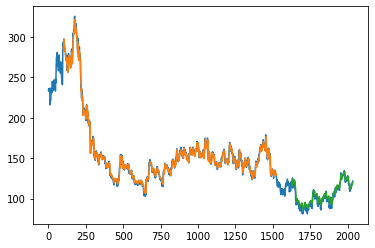

In [ ]:
#Plotting

#Shift train prediction for plotting
look_back = 100
trainPredictPlot = np.empty_like(df_close)
trainPredictPlot[:,:] = np.nan
trainPredictPlot[look_back:len(train_predict) + look_back, :] = train_predict

#Shift test prediction for plotting
testPredictPlot = np.empty_like(df_close)
testPredictPlot[:,:] = np.nan
testPredictPlot[len(train_predict) + (look_back * 2)+1:len(df_close) - 1, :] = test_predict

#Plot baseline and predictions
plt.plot(scaler.inverse_transform(df_close))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [ ]:
len(test_data), x_test.shape

(509, (408, 100, 1))

In [ ]:
x_input = test_data[207:].reshape(1,-1)
x_input.shape

(1, 302)

In [ ]:
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

In [ ]:
lst_output=[]
n_steps=301
nextNumberOfDays = 30
i=0

while(i<nextNumberOfDays):

    if(len(temp_input)>100):
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1


print(lst_output)

0 day input [0.01940359 0.02246732 0.03125    0.02348856 0.0249183  0.02144608
 0.04840686 0.04575163 0.03962418 0.03921569 0.04758987 0.04513889
 0.04166667 0.04125817 0.05044935 0.05555556 0.05494281 0.05412582
 0.0435049  0.04799837 0.05147059 0.05065359 0.03431373 0.04575163
 0.04187092 0.04554739 0.03941993 0.02716503 0.03125    0.05882353
 0.07148693 0.08721405 0.08986928 0.10498366 0.08905229 0.10355392
 0.10375817 0.12275327 0.10906863 0.09660948 0.1064134  0.10457516
 0.11049837 0.1127451  0.09803922 0.09987745 0.08925654 0.0747549
 0.08169935 0.08925654 0.09068627 0.08129085 0.08823529 0.08455882
 0.07945261 0.08374183 0.07781863 0.09824346 0.09089052 0.09007353
 0.09558824 0.06862745 0.06372549 0.0494281  0.04799837 0.04534314
 0.0443219  0.03941993 0.0379902  0.04656863 0.05085784 0.07209967
 0.06535948 0.07230392 0.07802288 0.07741013 0.06086601 0.06413399
 0.07046569 0.05412582 0.0498366  0.05167484 0.05330882 0.0435049
 0.02634804 0.02410131 0.02961601 0.01960784 0.02961

In [ ]:
day_new = np.arange(1,101)
day_pred = np.arange(101,131)

In [ ]:
df3 = df_close.tolist()
df3.extend(lst_output)

In [ ]:
len(df_close)

2035

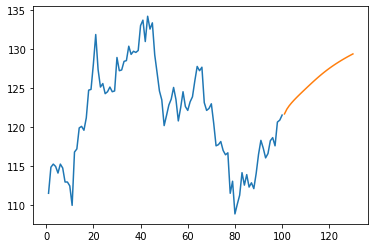

In [ ]:
plt.plot(day_new, scaler.inverse_transform(df_close[1935:]))
plt.plot(day_pred, scaler.inverse_transform(lst_output))

# THANK YOU